In [ ]:
#3 observable trends
#Urban cities tended to have more drivers, more rides and lower fares whereas rural cities tended to have less drivers, less rides and higher fares.
#There is a positive corellation between number of drivers and the size of the city.
#There is a negative correlation between fare price and the number of rides. 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

city_df = pd.read_csv("city_data.csv")

ride_df = pd.read_csv("ride_data.csv")

In [102]:
merge_df = pd.merge(city_df, ride_df, on="city")

merge_df.head(5)



,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [108]:
#Set up data for scatterplot
#color indicates city type
#circle size is indicative of driver number
#X axis is total number of rides per city
#Y axis is average fare cost

citytype_urban = city_df.loc[city_df["type"]=="Urban"]
drivers_urban = citytype_urban["driver_count"].tolist()
urban_df = merge_df.loc[merge_df["type"]=="Urban"]
group_urban = urban_df.groupby("city")
rides_city_urban = group_urban["type"].count()
avgfare_urban = group_urban["fare"].mean()

citytype_rural = city_df.loc[city_df["type"]=="Rural"]
drivers_rural = citytype_rural["driver_count"].tolist()
rural_df = merge_df.loc[merge_df["type"]=="Rural"]
group_rural = rural_df.groupby("city")
rides_city_rural = group_rural["type"].count()
avgfare_rural = group_rural["fare"].mean()


citytype_s = city_df.loc[city_df["type"]=="Suburban"]
drivers_s = citytype_s["driver_count"].tolist()
s_df = merge_df.loc[merge_df["type"]=="Suburban"]
group_s = s_df.groupby("city")
rides_city_s = group_s["type"].count()
avgfare_s = group_s["fare"].mean()



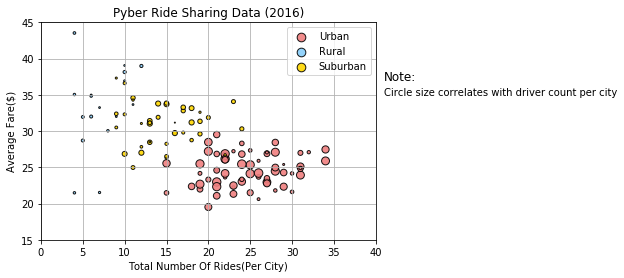

In [110]:
#Scatterplot graphing

sct_urban = plt.scatter(x=rides_city_urban,y=avgfare_urban,marker="o",
                        color="lightcoral",s=drivers_urban,edgecolors='black',alpha=0.9,label="Urban")
sct_rural = plt.scatter(x=rides_city_rural,y=avgfare_rural,marker="o",
                        color="lightskyblue",s=drivers_rural,edgecolors='black',alpha=0.9,label="Rural")
sct_s = plt.scatter(x=rides_city_s,y=avgfare_s,marker="o",
                      color="gold",s=drivers_sub,edgecolors='black',alpha=0.9,label="Suburban")

lgnd = plt.legend(handles=[sct_urban,sct_rural,sct_s],loc="best")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.text(41,37,'Note:',fontsize=12)
plt.text(41,35,'Circle size correlates with driver count per city',fontsize=10)

plt.xlim(0,40)
plt.ylim(15,45)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Rides(Per City)")
plt.ylabel("Average Fare($)")

plt.grid(True)

plt.show()

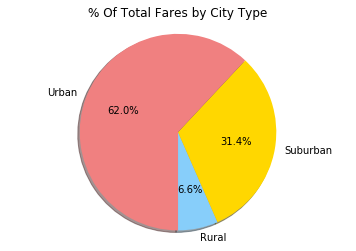

In [105]:
#Total fares by city type

Fare_Total = ride_df["fare"].sum()
City_Type = merge_df.groupby("type")
Total_Fare_CityType = City_Type["fare"].sum()
Percent_ByCity = [(x/Fare_Total)*100 for x in Total_Fare_CityType]

labels = ["Rural", "Suburban", "Urban"]
colors = ["lightskyblue", "gold", "lightcoral"]

plt.pie(Percent_ByCity, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

explode = [0, 0, 0]
plt.axis("equal")
plt.title("% Of Total Fares by City Type")
plt.show()

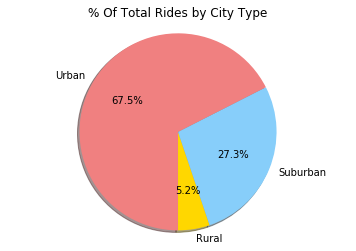

In [106]:
#total rides by city type

total_rides = ride_df["ride_id"].count()
total_rides_citytype = grouped_type["ride_id"].count()
percent_rides_citytype = [(x/total_rides)*100 for x in total_rides_citytype]

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(percent_rides_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

explode = [0, 0, 0]
plt.axis("equal")
plt.title("% Of Total Rides by City Type")
plt.show()

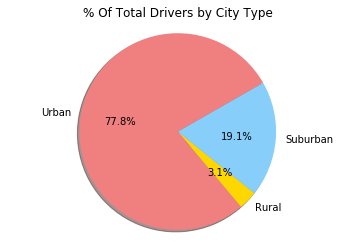

In [107]:
#total drivers by city type

total_drivers = city_df["driver_count"].sum()
group_cities = city_df.groupby("type")
total_drivers_bycity = group_cities["driver_count"].sum()
percent_drivers = [(x/total_drivers)*100 for x in total_drivers_bycity]

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(percent_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=310)

explode = [0, 0, 0]
plt.axis("equal")
plt.title("% Of Total Drivers by City Type")
plt.show()